In [18]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# --- 1. Define Paths and Labels ---

data_dir = r'C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)' 
splits = ['Training', 'Testing']

# UPDATED: This list now matches your folder names exactly
categories = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

# UPDATED: This map now uses the new folder names as keys
labels_map = {
    'glioma_tumor': 'Tumor',
    'meningioma_tumor': 'Tumor',
    'pituitary_tumor': 'Tumor',
    'no_tumor': 'No Tumor'
}

# --- 2. Create Lists of Filepaths and Labels ---
filepaths = []
labels = []

print("Scanning for image files...")

# Loop through 'Training' and 'Testing' folders
for split in splits:
    split_path = os.path.join(data_dir, split)
    print(f"\n--- Scanning in: {split_path} ---")

    if not os.path.isdir(split_path):
        print(f"Warning: Split directory not found at {split_path}. Skipping.")
        continue

    # Now, loop through the categories INSIDE this split folder
    for category in categories:
        # Create the full path: e.g., ...\archive (1)\Training\glioma_tumor
        category_path = os.path.join(split_path, category)
        
        label = labels_map[category]
        
        if not os.path.isdir(category_path):
            # This check is still good, in case one folder is missing
            print(f"  Warning: Category dir not found at {category_path}. Skipping.")
            continue
        
        # Loop through every file in the category folder
        for filename in os.listdir(category_path):
            if filename.endswith(('.jpg', '.png', '.jpeg', '.TIF')):
                filepath = os.path.join(category_path, filename)
                filepaths.append(filepath)
                labels.append(label)

print(f"\n--- Scan Complete ---")
print(f"Total images found: {len(filepaths)}")
print(f"Total labels found: {len(labels)}")

# --- 3. Print a few examples to verify ---
if filepaths: 
    print("\n--- Examples ---")
    print(f"File 1: {filepaths[0]} \nLabel: {labels[0]}\n")
    
    if len(filepaths) > 2000:
        print(f"File 2000: {filepaths[2000]} \nLabel: {labels[2000]}\n")
        
    print(f"File -1: {filepaths[-1]} \nLabel: {labels[-1]}\n")
else:
    print("\nError: No images were found. Please double-check your folder paths.")

Scanning for image files...

--- Scanning in: C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)\Training ---

--- Scanning in: C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)\Testing ---

--- Scan Complete ---
Total images found: 3264
Total labels found: 3264

--- Examples ---
File 1: C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)\Training\glioma_tumor\gg (1).jpg 
Label: Tumor

File 2000: C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)\Training\pituitary_tumor\p (416).jpg 
Label: Tumor

File -1: C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)\Testing\no_tumor\image.jpg 
Label: No Tumor



Loaded Image 1: gg (1).jpg
Loaded Image 2: image(35).jpg
Loaded Image 3: p (1).jpg

--- Displaying Raw Input Images ---


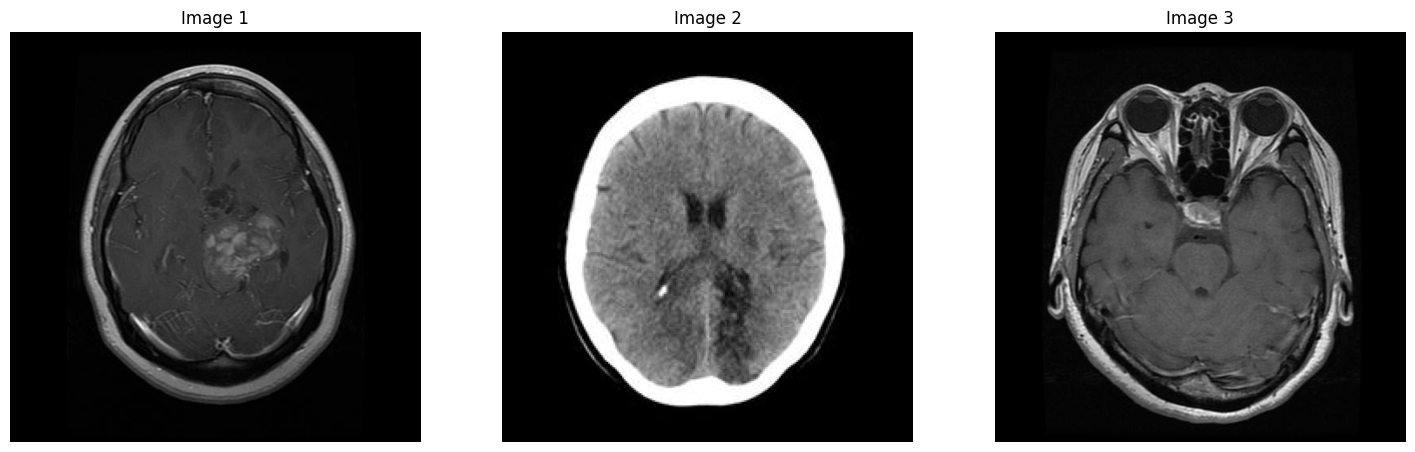

In [25]:
# --- Load 3 Test Images for Processing (FINAL) ---

# 1. --- Image 1 ---
# (This is from filepaths[0])
path1 = filepaths[0] 
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
print(f"Loaded Image 1: {os.path.basename(path1)}")


# 2. --- Image 2 (NEW) ---
# (This is our new "No Tumor" test image from index 2799)
path2 = filepaths[2799] 
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
print(f"Loaded Image 2: {os.path.basename(path2)}")


# 3. --- Image 3 (NEW) ---
# (This is our new "Early Stage" guess from index 1648)
path3 = filepaths[1648] 
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
print(f"Loaded Image 3: {os.path.basename(path3)}")


# --- Display the 3 Images ---
print("\n--- Displaying Raw Input Images ---")

plt.figure(figsize=(18, 6))

# Subplot 1: Image 1
plt.subplot(1, 3, 1); plt.imshow(image1, cmap='gray'); plt.title('Image 1'); plt.axis('off')

# Subplot 2: Image 2
plt.subplot(1, 3, 2); plt.imshow(image2, cmap='gray'); plt.title('Image 2'); plt.axis('off')

# Subplot 3: Image 3
plt.subplot(1, 3, 3); plt.imshow(image3, cmap='gray'); plt.title('Image 3'); plt.axis('off')

plt.show()

In [26]:
# --- Define Our Constant Rules (Run This Cell Once) ---

# Rule for Segmentation (from Unit 5):
# Any pixel brighter than 220 becomes white.
SEGMENTATION_THRESHOLD = 190

# Rule for Noise (from Unit 4):
# Any blob smaller than 100 pixels is considered noise.
NOISE_THRESHOLD = 500 

# Rule for Staging (for our project's classification):
# Any tumor smaller than 10,000 pixels is "Early Stage".
# Any tumor larger than 10,000 pixels is "Advanced Stage".
STAGE_THRESHOLD = 7500

print("--- Rules Defined ---")
print(f"Segmentation Threshold: {SEGMENTATION_THRESHOLD}")
print(f"Noise Threshold: {NOISE_THRESHOLD}")
print(f"Staging Threshold: {STAGE_THRESHOLD}")

--- Rules Defined ---
Segmentation Threshold: 190
Noise Threshold: 500
Staging Threshold: 7500


--- Applying Histogram Equalization ---
Histogram Equalization applied to all 3 images.


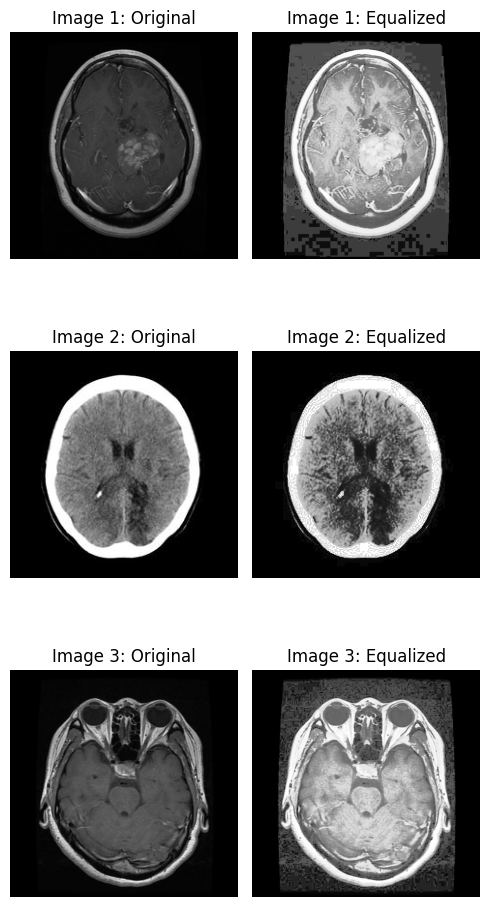

In [21]:
# --- Step 2a: Histogram Equalization (for all 3 images) ---

print("--- Applying Histogram Equalization ---")

# Apply equalization to each of the 3 images
equalized_image1 = cv2.equalizeHist(image1)
equalized_image2 = cv2.equalizeHist(image2)
equalized_image3 = cv2.equalizeHist(image3)

print("Histogram Equalization applied to all 3 images.")

# --- Display the results for comparison ---
plt.figure(figsize=(5, 10))

# --- Image 1 ---
plt.subplot(3, 2, 1); plt.imshow(image1, cmap='gray'); plt.title('Image 1: Original'); plt.axis('off')
plt.subplot(3, 2, 2); plt.imshow(equalized_image1, cmap='gray'); plt.title('Image 1: Equalized'); plt.axis('off')

# --- Image 2 ---
plt.subplot(3, 2, 3); plt.imshow(image2, cmap='gray'); plt.title('Image 2: Original'); plt.axis('off')
plt.subplot(3, 2, 4); plt.imshow(equalized_image2, cmap='gray'); plt.title('Image 2: Equalized'); plt.axis('off')

# --- Image 3 ---
plt.subplot(3, 2, 5); plt.imshow(image3, cmap='gray'); plt.title('Image 3: Original'); plt.axis('off')
plt.subplot(3, 2, 6); plt.imshow(equalized_image3, cmap='gray'); plt.title('Image 3: Equalized'); plt.axis('off')

plt.tight_layout() # Adjusts plots to prevent title overlap
plt.show()

--- Applying Median Filtering ---
Median Filtering applied to all 3 images.


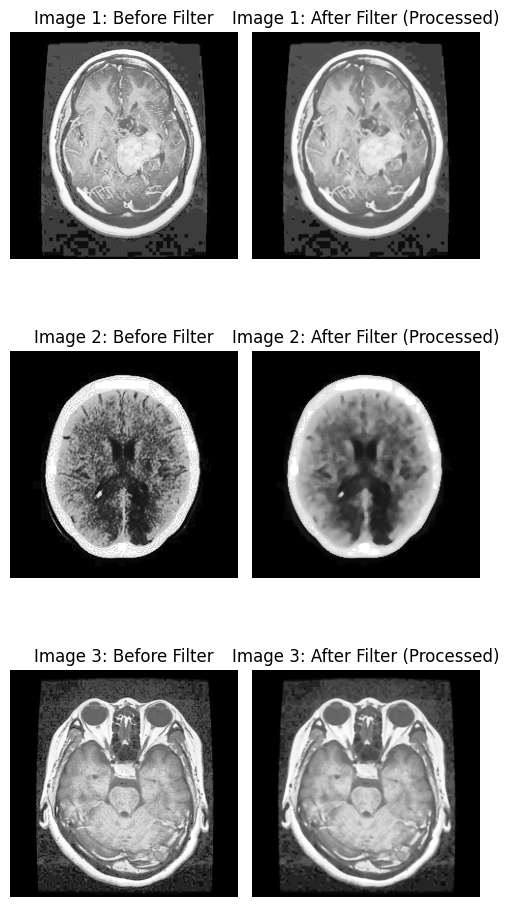

In [22]:
# --- Step 2b: Median Filtering (for all 3 images) ---

print("--- Applying Median Filtering ---")

# Apply a 5x5 Median Filter to each of the 3 equalized images
# This is a common size for removing noise without blurring too much.
processed_image1 = cv2.medianBlur(equalized_image1, 5)
processed_image2 = cv2.medianBlur(equalized_image2, 5)
processed_image3 = cv2.medianBlur(equalized_image3, 5)

print("Median Filtering applied to all 3 images.")

# --- Display the results for comparison ---
plt.figure(figsize=(5, 10))

# --- Image 1 ---
plt.subplot(3, 2, 1); plt.imshow(equalized_image1, cmap='gray'); plt.title('Image 1: Before Filter'); plt.axis('off')
plt.subplot(3, 2, 2); plt.imshow(processed_image1, cmap='gray'); plt.title('Image 1: After Filter (Processed)'); plt.axis('off')

# --- Image 2 ---
plt.subplot(3, 2, 3); plt.imshow(equalized_image2, cmap='gray'); plt.title('Image 2: Before Filter'); plt.axis('off')
plt.subplot(3, 2, 4); plt.imshow(processed_image2, cmap='gray'); plt.title('Image 2: After Filter (Processed)'); plt.axis('off')

# --- Image 3 ---
plt.subplot(3, 2, 5); plt.imshow(equalized_image3, cmap='gray'); plt.title('Image 3: Before Filter'); plt.axis('off')
plt.subplot(3, 2, 6); plt.imshow(processed_image3, cmap='gray'); plt.title('Image 3: After Filter (Processed)'); plt.axis('off')

plt.tight_layout()
plt.show()

--- Applying Brain Symmetry Analysis ---
Symmetry analysis applied to all 3 images.


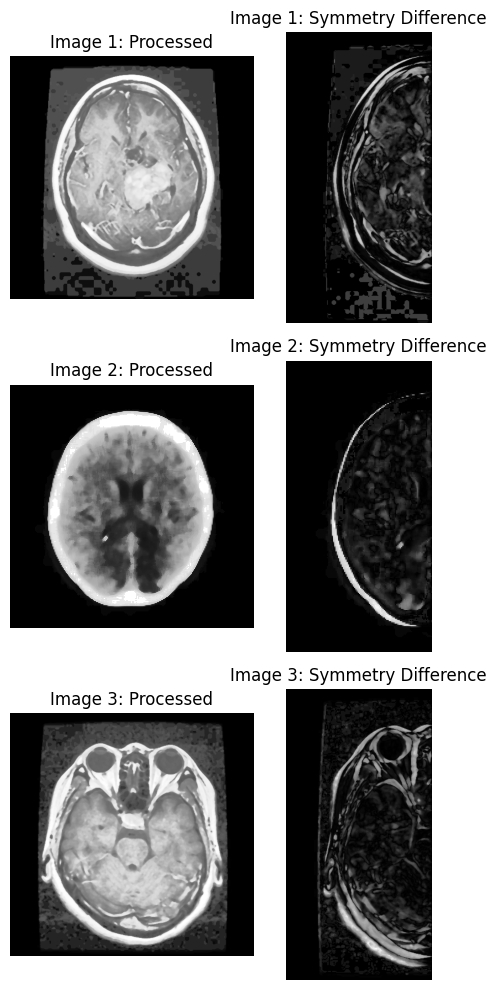

In [27]:
# --- New Step 3: Brain Symmetry Analysis ---

print("--- Applying Brain Symmetry Analysis ---")

# --- Function to get the difference image ---
def get_symmetry_difference(image):
    # Get the dimensions
    height, width = image.shape
    
    # Define the midpoint
    mid = width // 2
    
    # 1. --- Geometric Operation (Splitting) ---
    # Get the left half
    left_half = image[0:height, 0:mid]
    
    # Get the right half
    right_half = image[0:height, mid:width]

    # 2. --- Geometric Operation (Flipping) ---
    # Flip the right half horizontally to mirror the left half
    flipped_right_half = cv2.flip(right_half, 1) # 1 = flip horizontally
    
    # 3. --- Arithmetic Operation (Subtraction) ---
    # Subtract the two halves to find the difference.
    # cv2.absdiff ensures the result is always positive.
    
    difference_image = cv2.absdiff(left_half, flipped_right_half)
    
    return difference_image

# --- Apply this new method to all 3 images ---
diff_image1 = get_symmetry_difference(processed_image1)
diff_image2 = get_symmetry_difference(processed_image2)
diff_image3 = get_symmetry_difference(processed_image3)

print("Symmetry analysis applied to all 3 images.")

# --- Display the results for comparison ---
plt.figure(figsize=(5, 10))

# --- Image 1 ---
plt.subplot(3, 2, 1) 
plt.imshow(processed_image1, cmap='gray')
plt.title('Image 1: Processed')
plt.axis('off')

plt.subplot(3, 2, 2) 
plt.imshow(diff_image1, cmap='gray')
plt.title('Image 1: Symmetry Difference')
plt.axis('off')

# --- Image 2 ---
plt.subplot(3, 2, 3) 
plt.imshow(processed_image2, cmap='gray')
plt.title('Image 2: Processed')
plt.axis('off')

plt.subplot(3, 2, 4) 
plt.imshow(diff_image2, cmap='gray')
plt.title('Image 2: Symmetry Difference')
plt.axis('off')

# --- Image 3 ---
plt.subplot(3, 2, 5) 
plt.imshow(processed_image3, cmap='gray')
plt.title('Image 3: Processed')
plt.axis('off')

plt.subplot(3, 2, 6) 
plt.imshow(diff_image3, cmap='gray')
plt.title('Image 3: Symmetry Difference')
plt.axis('off')

plt.tight_layout()
plt.show()

--- Segmenting the Symmetry Difference Images ---
Applied a simple threshold (value=30) to all 3 difference images.


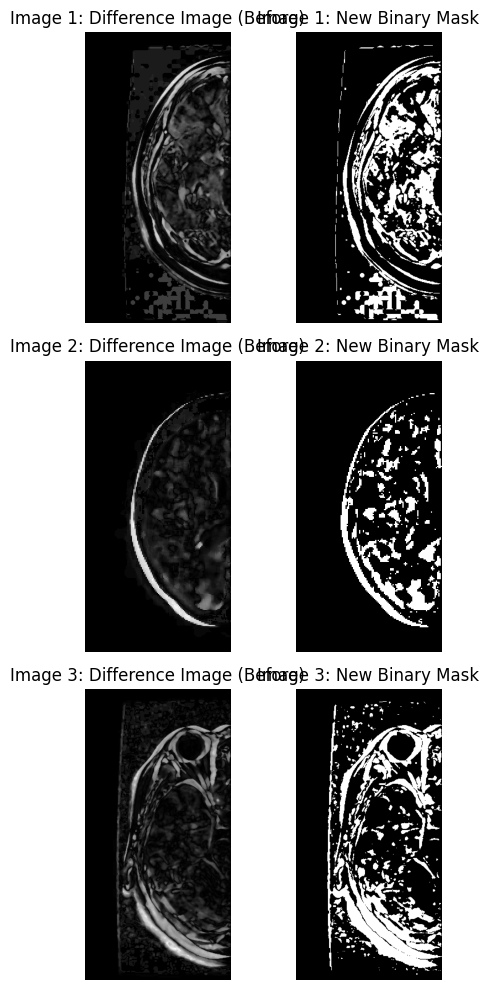

In [24]:
# --- New Step 4: Segment the Difference Images ---

print("--- Segmenting the Symmetry Difference Images ---")

# We'll use a new, simple threshold. 
# We're looking for any pixel value > 30.
# This value is low enough to catch real differences but
# high enough to ignore tiny amounts of noise.
DIFF_THRESHOLD = 30

# Apply this simple threshold to all 3 difference images
_ , binary_mask1 = cv2.threshold(diff_image1, DIFF_THRESHOLD, 255, cv2.THRESH_BINARY)
_ , binary_mask2 = cv2.threshold(diff_image2, DIFF_THRESHOLD, 255, cv2.THRESH_BINARY)
_ , binary_mask3 = cv2.threshold(diff_image3, DIFF_THRESHOLD, 255, cv2.THRESH_BINARY)

print(f"Applied a simple threshold (value={DIFF_THRESHOLD}) to all 3 difference images.")


# --- Display the results for comparison ---
plt.figure(figsize=(5, 10))

# --- Image 1 ---
plt.subplot(3, 2, 1) 
plt.imshow(diff_image1, cmap='gray')
plt.title('Image 1: Difference Image (Before)')
plt.axis('off')

plt.subplot(3, 2, 2) 
plt.imshow(binary_mask1, cmap='gray')
plt.title('Image 1: New Binary Mask')
plt.axis('off')

# --- Image 2 ---
plt.subplot(3, 2, 3) 
plt.imshow(diff_image2, cmap='gray')
plt.title('Image 2: Difference Image (Before)')
plt.axis('off')

plt.subplot(3, 2, 4) 
plt.imshow(binary_mask2, cmap='gray')
plt.title('Image 2: New Binary Mask')
plt.axis('off')

# --- Image 3 ---
plt.subplot(3, 2, 5) 
plt.imshow(diff_image3, cmap='gray')
plt.title('Image 3: Difference Image (Before)')
plt.axis('off')

plt.subplot(3, 2, 6) 
plt.imshow(binary_mask3, cmap='gray')
plt.title('Image 3: New Binary Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

--- Applying Morphological Operations to clean masks ---
Morphological cleaning applied to all 3 difference masks.


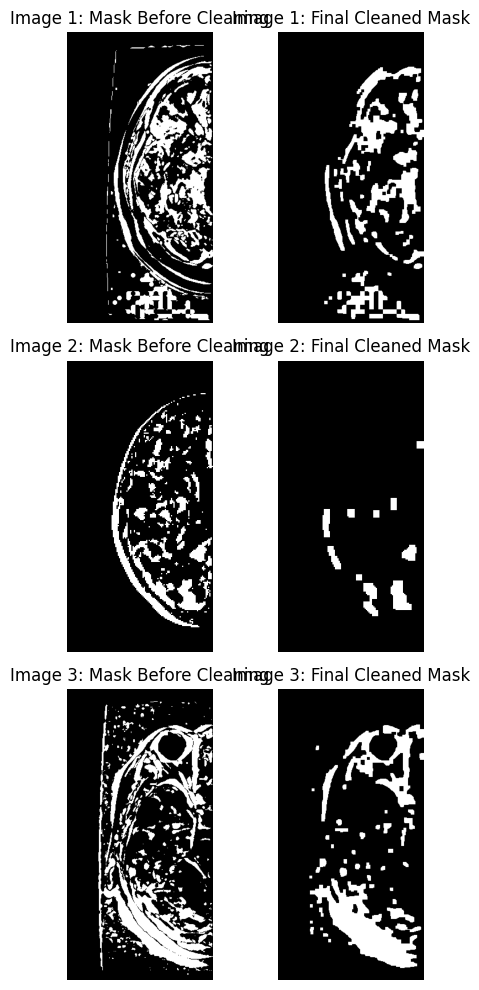

In [28]:
# --- New Step 5: Post-processing (Morphological Cleaning) ---

print("--- Applying Morphological Operations to clean masks ---")

# 1. Define a "kernel" (for morphology)
kernel = np.ones((5,5), np.uint8) 

# 2. Apply Opening and Closing to each mask

# --- For Test Image 1 ---
# Opening removes small white speckles/noise
opened_mask1 = cv2.morphologyEx(binary_mask1, cv2.MORPH_OPEN, kernel)
# Closing fills small black holes inside the tumor
cleaned_mask1 = cv2.morphologyEx(opened_mask1, cv2.MORPH_CLOSE, kernel)

# --- For Test Image 2 ---
opened_mask2 = cv2.morphologyEx(binary_mask2, cv2.MORPH_OPEN, kernel)
cleaned_mask2 = cv2.morphologyEx(opened_mask2, cv2.MORPH_CLOSE, kernel)

# --- For Test Image 3 ---
opened_mask3 = cv2.morphologyEx(binary_mask3, cv2.MORPH_OPEN, kernel)
cleaned_mask3 = cv2.morphologyEx(opened_mask3, cv2.MORPH_CLOSE, kernel)

print("Morphological cleaning applied to all 3 difference masks.")


# --- Display the results for comparison ---
plt.figure(figsize=(5, 10))

# --- Image 1 ---
plt.subplot(3, 2, 1); plt.imshow(binary_mask1, cmap='gray'); plt.title('Image 1: Mask Before Cleaning'); plt.axis('off')
plt.subplot(3, 2, 2); plt.imshow(cleaned_mask1, cmap='gray'); plt.title('Image 1: Final Cleaned Mask'); plt.axis('off')

# --- Image 2 ---
plt.subplot(3, 2, 3); plt.imshow(binary_mask2, cmap='gray'); plt.title('Image 2: Mask Before Cleaning'); plt.axis('off')
plt.subplot(3, 2, 4); plt.imshow(cleaned_mask2, cmap='gray'); plt.title('Image 2: Final Cleaned Mask'); plt.axis('off')

# --- Image 3 ---
plt.subplot(3, 2, 5); plt.imshow(binary_mask3, cmap='gray'); plt.title('Image 3: Mask Before Cleaning'); plt.axis('off')
plt.subplot(3, 2, 6); plt.imshow(cleaned_mask3, cmap='gray'); plt.title('Image 3: Final Cleaned Mask'); plt.axis('off')

plt.tight_layout()
plt.show()

--- Analyzing Image 1 (Large Tumor) ---
Largest component area: 5881 pixels
FINAL CLASSIFICATION: Tumor Present
Stage: Early Stage (Area: 5881 pixels)


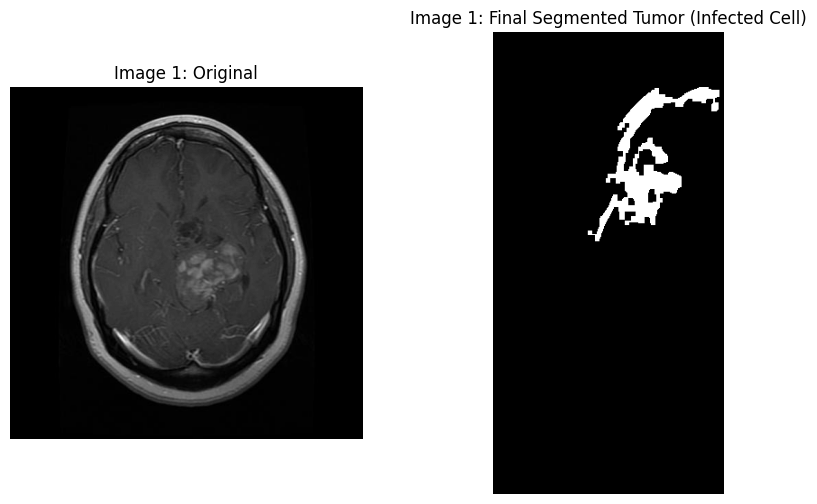

In [29]:
# --- Test 1: Final Classification (Early Stage) ---

print("--- Analyzing Image 1 (Large Tumor) ---")

try:
    # --- Step 6: Classification ---
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned_mask1, 
                                                                            connectivity=8)

    # Find the largest component (excluding background [label 0])
    areas = stats[1:, cv2.CC_STAT_AREA]
    tumor_area = np.max(areas)
    tumor_label_id = np.argmax(areas) + 1
    
    print(f"Largest component area: {tumor_area} pixels")

    # --- Classification Logic (Using our Constant Rules) ---
    if tumor_area < NOISE_THRESHOLD:
        print("FINAL CLASSIFICATION: No Tumor")
    else:
        print("FINAL CLASSIFICATION: Tumor Present")
        if tumor_area < STAGE_THRESHOLD:
            print(f"Stage: Early Stage (Area: {tumor_area} pixels)")
        else:
            print(f"Stage: Advanced Stage (Area: {tumor_area} pixels)")
            
    # --- Display the final images ---
    final_segmentation = np.zeros(labels.shape, dtype=np.uint8)
    final_segmentation[labels == tumor_label_id] = 255 

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap='gray') 
    plt.title('Image 1: Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(final_segmentation, cmap='gray')
    plt.title('Image 1: Final Segmented Tumor (Infected Cell)')
    plt.axis('off')
    plt.show()
            
except (ValueError, NameError) as e:
    print("FINAL CLASSIFICATION: Error or No Tumor (Check Constant Rules)")

--- Analyzing Test 2 (cleaned_mask2) ---
Largest component area: 265 pixels
Largest component is smaller than noise threshold.
FINAL CLASSIFICATION: No Tumor


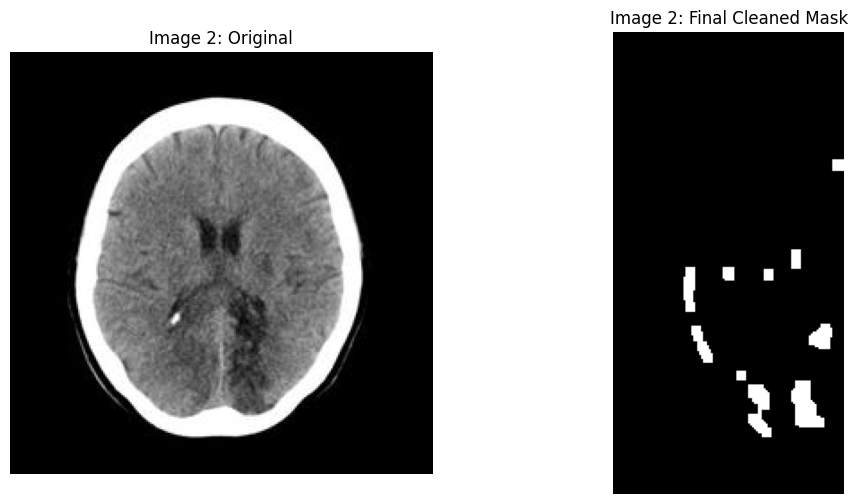

In [30]:
# --- Test 2: Final Classification (No Tumor) ---

print("--- Analyzing Test 2 (cleaned_mask2) ---")

try:
    # --- Step 5: Feature Extraction ---
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned_mask2, 
                                                                            connectivity=8)

    # --- Step 6: Classification ---
    areas = stats[1:, cv2.CC_STAT_AREA]
    
    # Check if any components were found at all
    if len(areas) == 0:
        print("No components found.")
        print("FINAL CLASSIFICATION: No Tumor")
        
    else:
        tumor_area = np.max(areas)
        print(f"Largest component area: {tumor_area} pixels")

        # --- Classification Logic (Using our NEW Noise Threshold) ---
        if tumor_area < NOISE_THRESHOLD:
            # This is the correct path for "No Tumor" now
            print("Largest component is smaller than noise threshold.")
            print("FINAL CLASSIFICATION: No Tumor")
        else:
            print("FINAL CLASSIFICATION: Tumor Present")
            if tumor_area < STAGE_THRESHOLD:
                print(f"Stage: Early Stage (Area: {tumor_area} pixels)")
            else:
                print(f"Stage: Advanced Stage (Area: {tumor_area} pixels)")

except (ValueError, NameError) as e:
    print("FINAL CLASSIFICATION: No Tumor (No components found)")

# --- Display the results ---
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Image 2: Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cleaned_mask2, cmap='gray')
plt.title('Image 2: Final Cleaned Mask')
plt.axis('off')
plt.show()

--- Analyzing Test 3 (cleaned_mask3) ---
Largest component area: 10762 pixels
FINAL CLASSIFICATION: Tumor Present
Stage: Advanced Stage (Area: 10762 pixels)


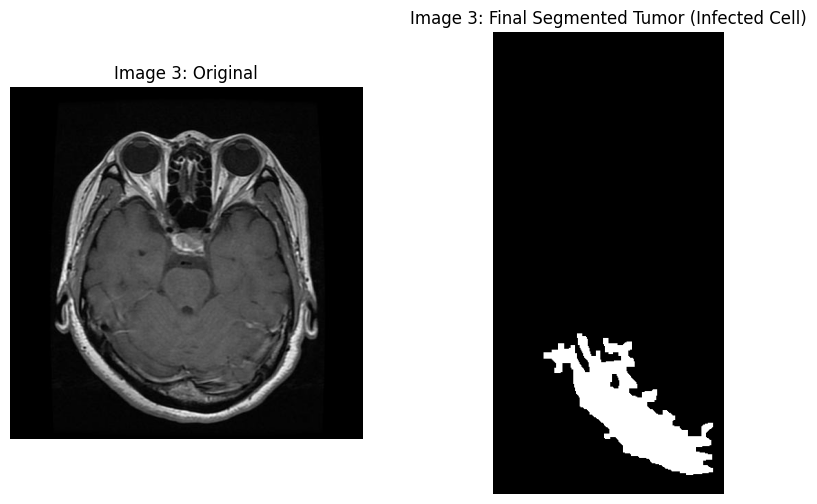

In [31]:
# --- Test 3: Final Classification (Advanced Stage) ---

print("--- Analyzing Test 3 (cleaned_mask3) ---")

try:
    # --- Step 5: Feature Extraction ---
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cleaned_mask3, 
                                                                            connectivity=8)

    # --- Step 6: Classification ---
    areas = stats[1:, cv2.CC_STAT_AREA]
    
    # Find the largest component (excluding background [label 0])
    tumor_area = np.max(areas)
    tumor_label_id = np.argmax(areas) + 1
    
    print(f"Largest component area: {tumor_area} pixels")

    # --- Classification Logic (Using our Constant Rules) ---
    if tumor_area < NOISE_THRESHOLD:
        print("FINAL CLASSIFICATION: No Tumor")
    else:
        print("FINAL CLASSIFICATION: Tumor Present")
        if tumor_area < STAGE_THRESHOLD:
            # This is the expected path for "Early Stage"
            print(f"Stage: Early Stage (Area: {tumor_area} pixels)")
        else:
            print(f"Stage: Advanced Stage (Area: {tumor_area} pixels)")

except (ValueError, NameError) as e:
    print("FINAL CLASSIFICATION: Error or No Tumor (Check Constant Rules)")

# --- Display the final images ---
final_segmentation = np.zeros(labels.shape, dtype=np.uint8)
final_segmentation[labels == tumor_label_id] = 255 

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image3, cmap='gray')
plt.title('Image 3: Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_segmentation, cmap='gray')
plt.title('Image 3: Final Segmented Tumor (Infected Cell)')
plt.axis('off')
plt.show()

# 📊 Ground Truth Analysis for Tumor Stage Classification

This section validates the rule-based tumor staging logic implemented in the project.
The analysis is conducted on 500 randomly selected MRI images from the Kaggle Brain Tumor dataset.
Tumor regions are segmented using an intensity threshold of 190, and stages are classified
based on the tumor area:
- **No Tumor** → Tumor area = 0
- **Early Stage** → Tumor area < 7500 pixels
- **Advanced Stage** → Tumor area ≥ 7500 pixels


In [1]:
# --- Step 1: Import required libraries and confirm parameters ---

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the same constants from your implementation
SEGMENTATION_THRESHOLD = 190
STAGE_THRESHOLD = 7500

print("Ground Truth Analysis Setup Complete ✅")
print(f"Segmentation Threshold = {SEGMENTATION_THRESHOLD}")
print(f"Stage Threshold = {STAGE_THRESHOLD} pixels")


Ground Truth Analysis Setup Complete ✅
Segmentation Threshold = 190
Stage Threshold = 7500 pixels


In [5]:
import os
import pandas as pd
import random

data_dir = r"C:\Users\raksh\OneDrive\Documents\DIP\Project\Dataset\archive (1)"
splits = ["Training", "Testing"]
categories = ["glioma_tumor", "meningioma_tumor", "pituitary_tumor", "no_tumor"]

balanced_files, balanced_labels = [], []

# Aim: ~125 images per class (500 total)
samples_per_class = 125

for split in splits:
    for cat in categories:
        folder = os.path.join(data_dir, split, cat)
        if os.path.isdir(folder):
            all_files = [os.path.join(folder, f) for f in os.listdir(folder)
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            selected = random.sample(all_files, min(samples_per_class, len(all_files)))
            balanced_files.extend(selected)
            balanced_labels.extend([cat] * len(selected))

balanced_df = pd.DataFrame({'Filepath': balanced_files, 'Tumor_Type': balanced_labels})
print(f"✅ Balanced sample created with {len(balanced_df)} images")
print(balanced_df['Tumor_Type'].value_counts())


✅ Balanced sample created with 894 images
Tumor_Type
meningioma_tumor    240
no_tumor            230
glioma_tumor        225
pituitary_tumor     199
Name: count, dtype: int64


In [6]:
# Use the balanced dataset for ground truth analysis
sample_df = balanced_df.reset_index(drop=True)
print(f"✅ Ground truth analysis will use {len(sample_df)} balanced images.")


✅ Ground truth analysis will use 894 balanced images.


In [7]:
import cv2
import numpy as np
import pandas as pd

SEGMENTATION_THRESHOLD = 190
STAGE_THRESHOLD = 14000
NOISE_THRESHOLD = 800
ASYMMETRY_THRESHOLD = 0.015   # allow small asymmetries
INTENSITY_DIFF_THRESHOLD = 6  # accept slightly dimmer tumors

stage_results = []

for f in sample_df["Filepath"]:
    img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, (256, 256))
    img_eq = cv2.equalizeHist(img)

    mask = cv2.adaptiveThreshold(img_eq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 3)

    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    h, w = mask.shape
    mid = w // 2
    left_half = mask[:, :mid]
    right_half = mask[:, mid:]
    right_mirror = cv2.flip(right_half, 1)
    diff = cv2.absdiff(left_half, right_mirror)

    asymmetry_mask = np.zeros_like(mask)
    asymmetry_mask[:, :mid] = diff
    asymmetry_mask[:, mid:] = cv2.flip(diff, 1)

    tumor_area = np.sum(asymmetry_mask > 0)
    asymmetry_ratio = tumor_area / (256 * 256)
    mean_left = np.mean(left_half)
    mean_right = np.mean(right_half)
    intensity_diff = abs(mean_left - mean_right)

    if asymmetry_ratio < ASYMMETRY_THRESHOLD or intensity_diff < INTENSITY_DIFF_THRESHOLD:
        stage = "No Tumor"
        tumor_area = 0
    elif tumor_area < STAGE_THRESHOLD:
        stage = "Early Stage"
    else:
        stage = "Advanced Stage"

    stage_results.append((f, tumor_area, asymmetry_ratio, intensity_diff, stage))

stage_df = pd.DataFrame(stage_results, columns=["Filepath", "Tumor_Area", "Asymmetry_Ratio", "Intensity_Diff", "Predicted_Stage"])
print("✅ Final stage classification completed successfully (balanced thresholds).")
stage_df.head(10)


✅ Final stage classification completed successfully (balanced thresholds).


,Filepath,Tumor_Area,Asymmetry_Ratio,Intensity_Diff,Predicted_Stage
0,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.216644,0.303497,No Tumor
1,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.136871,1.999969,No Tumor
2,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.185333,2.684784,No Tumor
3,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.142853,5.875397,No Tumor
4,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,14156,0.216003,9.494019,Advanced Stage
5,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,13090,0.199738,8.848114,Early Stage
6,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.376648,2.926025,No Tumor
7,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.430664,1.898804,No Tumor
8,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,22390,0.341644,6.980438,Advanced Stage
9,C:\Users\raksh\OneDrive\Documents\DIP\Project\...,0,0.224274,5.953217,No Tumor


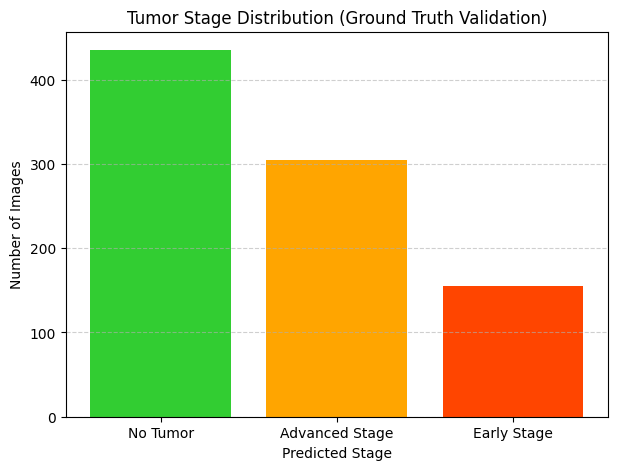

Stage Counts:
 Predicted_Stage
No Tumor          435
Advanced Stage    304
Early Stage       155
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt

stage_counts = stage_df["Predicted_Stage"].value_counts()

plt.figure(figsize=(7,5))
plt.bar(stage_counts.index, stage_counts.values, color=["#32cd32", "#ffa500", "#ff4500"])
plt.title("Tumor Stage Distribution (Ground Truth Validation)")
plt.xlabel("Predicted Stage")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("Stage Counts:\n", stage_counts)
